In [1]:
from keras.models import Sequential   ## 은닉층을 순서대로 쌓는다는 것
from keras.layers import Dense      ## 어떤 함수를 쓸것인지, 어떤 노드를 쓸것인지 지정
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.io import arff

import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time
from sklearn import metrics

Using TensorFlow backend.


In [2]:
data = pd.read_excel('../data/datagu.xlsx',encoding='utf-8')
data

,상권_코드_명,서비스_업종_코드_명,lat,lng,창업위험지수,평균시가,상권변화,유동인구,지하철,인구밀도,영업평균,평균매출건수,평균매출,구
0,중앙로25길,건강보조식품,37.515716,126.851755,3,14.387527,4,1.028744,1,30.967,10.083333,4.000000,1000.000000,양천구
1,중앙로36길,건강보조식품,37.519586,126.857182,3,12.103652,4,1.161948,3,30.967,10.083333,17.000000,1000.000000,양천구
2,효창원로39길,건강보조식품,37.535459,126.953599,4,20.757856,2,1.422528,2,21.217,9.750000,7.500000,1000.000000,용산구
3,삼성로147길,부동산중개업,37.521394,127.046197,3,79.254583,4,1.343456,3,12.955,7.750000,6.808824,1000.000000,성동구
4,삼일대로4길,부동산중개업,37.562007,126.989874,3,17.720513,3,2.085443,10,3.505,11.583333,2.200000,1000.000000,중구
5,전농로3길,분식전문점,37.575822,127.057997,4,12.688889,3,1.868100,0,23.664,10.083333,96.333333,1000.000000,동대문구
6,전농로3길,분식전문점,37.575822,127.057997,4,12.688889,3,1.868100,0,23.664,10.083333,122.000000,1000.000000,동대문구
7,퇴계로8길,서적·문구,37.557300,126.980157,3,17.446733,3,1.541870,6,7.086,11.750000,51.000000,1000.000000,중구
8,천호대로123길,서적·문구,37.557823,127.086420,3,14.843595,4,1.792761,3,41.271,8.166667,19.666667,1000.000000,광진구
9,삼일대로4길,서적·문구,37.562007,126.989874,3,17.720513,3,2.085443,10,3.505,11.583333,3.666667,1000.000000,중구


In [3]:
data['서비스_업종_코드_명'].unique()

array(['건강보조식품', '부동산중개업', '분식전문점', '서적·문구', '섬유제품', '슈퍼마켓', '스포츠클럽',
       '식료품', '양식음식점', '외국어학원', '자동차수리·세차', '주방·가정용품', '통신판매업', '피부관리실',
       '한식음식점', '핸드폰', '화장품', '가전제품수리', '세탁소(가정)', '화초·애완', '패션용품', '네일숍',
       '의류점', '가구·가전', '일반교습학원', '패스트푸드점', '치킨전문점', '숙박업', '오락·운동',
       '예체능학원', '커피·음료', '컴퓨터·주변기기', '당구장', '중식음식점', '두발미용업', '제과점',
       '호프·간이주점', '노래방', '일반의원', '일식음식점', '한의원', 'PC방', '의약·의료용품', '치과의원',
       '편의점'], dtype=object)

In [3]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [4]:
dataset = data.values
X = dataset[:,4:12]
Y = dataset[:,12]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\bit-user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bit-user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bit-user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
model = RandomForestRegressor(n_jobs=-1)


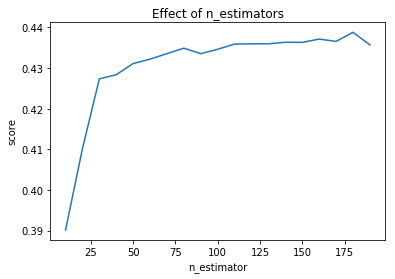

In [7]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [10]:
scores


[0.3901751763620398,
 0.41020164832275063,
 0.42735020566926396,
 0.4283842866409243,
 0.4311273553870354,
 0.43220061023608203,
 0.4335644973791033,
 0.43490115655975603,
 0.4335463491526699,
 0.43463314046688606,
 0.4359145674089102,
 0.43597238315516995,
 0.43597654046406853,
 0.4363509326717814,
 0.4363322806866867,
 0.4371313518564096,
 0.43656910819655625,
 0.43879643592964623,
 0.4357159031337178]

In [11]:
y_prediction = model.predict(X_test).flatten() ## flatten()은 배열을 1차원으로 만들어주는 함수

for i in range(1,30) :
    label = y_test[i]
    prediction = y_prediction[i]
    loss = (label - prediction)/label
    print("실제매출:{:.3f}. 예상매출:{:.3f}. 오차율:{:.3f}".format(label,prediction,loss))

실제매출:6854.857. 예상매출:36899.809. 오차율:-4.383
실제매출:26691.335. 예상매출:21177.689. 오차율:0.207
실제매출:18306.618. 예상매출:25914.913. 오차율:-0.416
실제매출:1595.098. 예상매출:3513.950. 오차율:-1.203
실제매출:5903.163. 예상매출:10388.540. 오차율:-0.760
실제매출:62850.552. 예상매출:154231.762. 오차율:-1.454
실제매출:25357.243. 예상매출:97766.376. 오차율:-2.856
실제매출:10175.626. 예상매출:39315.308. 오차율:-2.864
실제매출:35049.754. 예상매출:27474.625. 오차율:0.216
실제매출:37581.107. 예상매출:92439.953. 오차율:-1.460
실제매출:40670.272. 예상매출:152255.315. 오차율:-2.744
실제매출:4544.447. 예상매출:23892.823. 오차율:-4.258
실제매출:29527.626. 예상매출:44954.766. 오차율:-0.522
실제매출:1524.776. 예상매출:3535.760. 오차율:-1.319
실제매출:6211.962. 예상매출:14339.648. 오차율:-1.308
실제매출:21744.410. 예상매출:49632.337. 오차율:-1.283
실제매출:26479.630. 예상매출:66467.552. 오차율:-1.510
실제매출:315002.171. 예상매출:261894.219. 오차율:0.169
실제매출:23166.921. 예상매출:51432.162. 오차율:-1.220
실제매출:132666.973. 예상매출:38566.641. 오차율:0.709
실제매출:32086.846. 예상매출:45976.328. 오차율:-0.433
실제매출:12720.459. 예상매출:20437.161. 오차율:-0.607
실제매출:259878.954. 예상매출:228330.115. 오차율:0.121
실제매출:13331.360. 예